Total amino acid residues in protein == 318
81 [3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2] [3, 2, 3, 2]


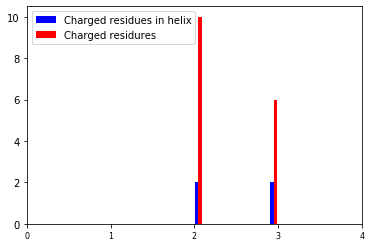

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
picture="Ddx4_pdb"
pdb=pd.read_csv('Ddx4_protein_modified.pdb',engine='python',skiprows=1,header=None,skipfooter=1,delim_whitespace=True,names=['a','b','c','res','e','f','g','h','i','j','k','l'])
sec_st=pd.read_csv('Ddx4_protein_sec_st.dat',skiprows=9,header=None,names=['atomno.','chain','ref','residue','structure'],delimiter=' ')
aa=pdb['res']
resno=pdb['f']
k=sec_st['structure']
countpdb=pdb.shape[0]
countsecst=sec_st.shape[0]
print("Total amino acid residues in protein == %d"%(countsecst))
ii=0
jj=1
ix=0
aminoacid=[]
while ii<countpdb-1:
    if resno[jj]!=resno[ii]:
        aminoacid.append(aa[ii])
    ii+=1
    jj+=1
aminoacid.append(aa[ii])

###Saving the dat file with amino acid and structure
newdf=pd.DataFrame(aminoacid,k)
newdf.to_csv(picture+".dat")
#################################################

ax=0
name1='LYS'
name2='ARG'
name3='GLU'
name4='ASP'
namex=['LYS','ARG','GLU','ARG']
namey= ['LYS','ARG','GLU','ARG','HIS']
##Counting total charged residues in the protein####
chcount=0
m2=0
while m2<countsecst-1:
    if aminoacid[m2] in namey:
        chcount+=1
    m2+=1
#print('Total chargesd residues are: %d'%(chcount))
#################################################

##Counting number of Charged amino acids occuring together
m3=0
zz=[]
while m3<countsecst:
    q=1
    while m3<countsecst-1:
        if aminoacid[m3] in namey and aminoacid[m3+1] in namey:
            q+=1
            #print(m3,m3+1)
        else:
            break
        m3+=1
    if q!=1:
        zz.append(q)
    m3+=1

##########################################################

##Couting number of charged amino acids occuring together and are helix
m1=0
xx=[]
while m1<countsecst:
        p=1
        while m1<countsecst-1:
            if k[m1]=='H' and k[m1+1]=='H' and aminoacid[m1] in namex and aminoacid[m1+1] in namex:
                p+=1
                #print(m1,m1+1)
            else:
                break
            m1+=1
        ##print(p)
        if p!=1:
            xx.append(p)
        m1+=1
####################################################
print(chcount,zz,xx)
#####Plotting the histogram#####
colors = ['b','r']
plt.hist([xx, zz], label=['Charged residues in helix', 'Charged residures'],color=colors)
plt.legend(loc='upper left')
#plt.hist(xx, bins=10)
#plt.hist(zz, bins=10)
plt.xticks(np.arange(0, 5, 1), fontfamily='sans-serif',fontsize=8) 
plt.savefig(picture+".png",dpi=300)

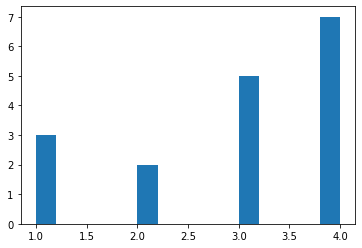

In [45]:
import matplotlib.pyplot as plt
XX
YY=[1,1,1,2,2,3,3,3,3,3,4,4,4,4,4,4,4]
gp= plt.hist(YY, bins=15) 

In [1]:
namex=['LYS','ARG','GLU','ARG']
if 'ARG' in namex:
    print('yes')

yes


In [2]:
import pystride

ModuleNotFoundError: No module named 'pystride'

In [3]:
conda install pustride

^C

Note: you may need to restart the kernel to use updated packages.
